AS A PART OF FOOD NUTRIENT ANALYSIS PROJECT
 
 
 A SUB-PROJECT DONE ON CALORIES PREDICTION USING MACHINE LEARNING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\food nutrient dataset.csv")

In [4]:
df

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,80200,"FROG LEGS,RAW",73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,83110,"MACKEREL,SALTED",305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,90240,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,90560,"SNAIL,RAW",90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0


In [5]:
df.head(10)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
5,1006,"CHEESE,BRIE",334.0,20.75,27.68,0.45,629.0,17.410,100.0,0.45,184.0,0.50,152.0,0.0,0.24,0.5
6,1007,"CHEESE,CAMEMBERT",300.0,19.80,24.26,0.46,842.0,15.259,72.0,0.46,388.0,0.33,187.0,0.0,0.21,0.4
7,1008,"CHEESE,CARAWAY",376.0,25.18,29.20,3.06,690.0,18.584,93.0,NaN,673.0,0.64,93.0,0.0,NaN,NaN
8,1009,"CHEESE,CHEDDAR",403.0,24.90,33.14,1.28,621.0,21.092,105.0,0.52,721.0,0.68,98.0,0.0,0.29,0.6
9,1010,"CHEESE,CHESHIRE",387.0,23.37,30.60,4.78,700.0,19.475,103.0,NaN,643.0,0.21,95.0,0.0,NaN,NaN


In [6]:
df.tail(10)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
7048,44203,"COCKTAIL MIX,NON-ALCOHOLIC,CONCD,FRZ",287.0,0.08,0.01,71.60,0.0,0.003,0.0,48.44,2.0,0.04,23.0,4.2,0.02,0.0
7049,44258,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX",365.0,10.08,3.00,74.42,3326.0,1.578,0.0,0.70,1512.0,3.87,570.0,0.0,0.02,0.0
7050,44259,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,REG,DRY MIX",351.0,1.60,0.10,86.04,1765.0,0.018,0.0,2.90,49.0,0.05,18.0,0.0,0.05,0.0
7051,44260,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",350.0,0.81,0.90,84.66,4250.0,0.099,0.0,0.90,143.0,0.38,30.0,0.0,0.08,0.0
7052,48052,VITAL WHEAT GLUTEN,370.0,75.16,1.85,13.79,29.0,0.272,0.0,0.00,142.0,5.20,100.0,0.0,0.00,0.0
7053,80200,"FROG LEGS,RAW",73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,83110,"MACKEREL,SALTED",305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,90240,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,90560,"SNAIL,RAW",90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0
7057,93600,"TURTLE,GREEN,RAW",89.0,19.80,0.50,0.00,68.0,0.127,50.0,0.00,118.0,1.40,230.0,0.0,0.50,0.0


In [7]:
df[60:65]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
60,1068,"CREAM SUB,LIQ,W/LAURIC ACID OIL&NA CASEINATE",136.0,1.00,9.97,11.38,79.0,9.304,0.0,NaN,9.0,0.03,191.0,0.0,NaN,NaN
61,1069,"CREAM SUBSTITUTE,POWDERED",545.0,4.79,35.48,54.88,181.0,32.525,0.0,54.88,22.0,1.15,812.0,0.0,0.59,0.0
62,1070,"DESSERT TOPPING,POWDERED",577.0,4.90,39.92,52.54,122.0,36.723,0.0,52.54,17.0,0.03,166.0,0.0,1.52,0.0
63,1071,"DESSERT TOPPING,PDR,1.5 OZ PREP W/1/2 CUP MILK",194.0,3.61,12.72,17.13,66.0,10.684,10.0,17.13,90.0,0.04,151.0,0.7,0.45,0.9
64,1072,"DESSERT TOPPING,PRESSURIZED",264.0,0.98,22.30,16.07,62.0,18.912,0.0,16.07,5.0,0.02,19.0,0.0,0.85,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7058 non-null   int64  
 1   Description   7058 non-null   object 
 2   Calories      7057 non-null   float64
 3   Protein       7057 non-null   float64
 4   TotalFat      7057 non-null   float64
 5   Carbohydrate  7057 non-null   float64
 6   Sodium        6974 non-null   float64
 7   SaturatedFat  6757 non-null   float64
 8   Cholesterol   6770 non-null   float64
 9   Sugar         5148 non-null   float64
 10  Calcium       6922 non-null   float64
 11  Iron          6935 non-null   float64
 12  Potassium     6649 non-null   float64
 13  VitaminC      6726 non-null   float64
 14  VitaminE      4338 non-null   float64
 15  VitaminD      4224 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 882.4+ KB


In [9]:
df.dtypes

ID                int64
Description      object
Calories        float64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
SaturatedFat    float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [10]:
df.columns

Index(['ID', 'Description', 'Calories', 'Protein', 'TotalFat', 'Carbohydrate',
       'Sodium', 'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron',
       'Potassium', 'VitaminC', 'VitaminE', 'VitaminD'],
      dtype='object')

# missing values

In [11]:
df = df.drop('ID',axis=1)

In [12]:
df.isna().sum()

Description        0
Calories           1
Protein            1
TotalFat           1
Carbohydrate       1
Sodium            84
SaturatedFat     301
Cholesterol      288
Sugar           1910
Calcium          136
Iron             123
Potassium        409
VitaminC         332
VitaminE        2720
VitaminD        2834
dtype: int64

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Protein'}>,
        <Axes: title={'center': 'TotalFat'}>,
        <Axes: title={'center': 'Carbohydrate'}>],
       [<Axes: title={'center': 'Sodium'}>,
        <Axes: title={'center': 'SaturatedFat'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Sugar'}>],
       [<Axes: title={'center': 'Calcium'}>,
        <Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'VitaminC'}>],
       [<Axes: title={'center': 'VitaminE'}>,
        <Axes: title={'center': 'VitaminD'}>, <Axes: >, <Axes: >]],
      dtype=object)

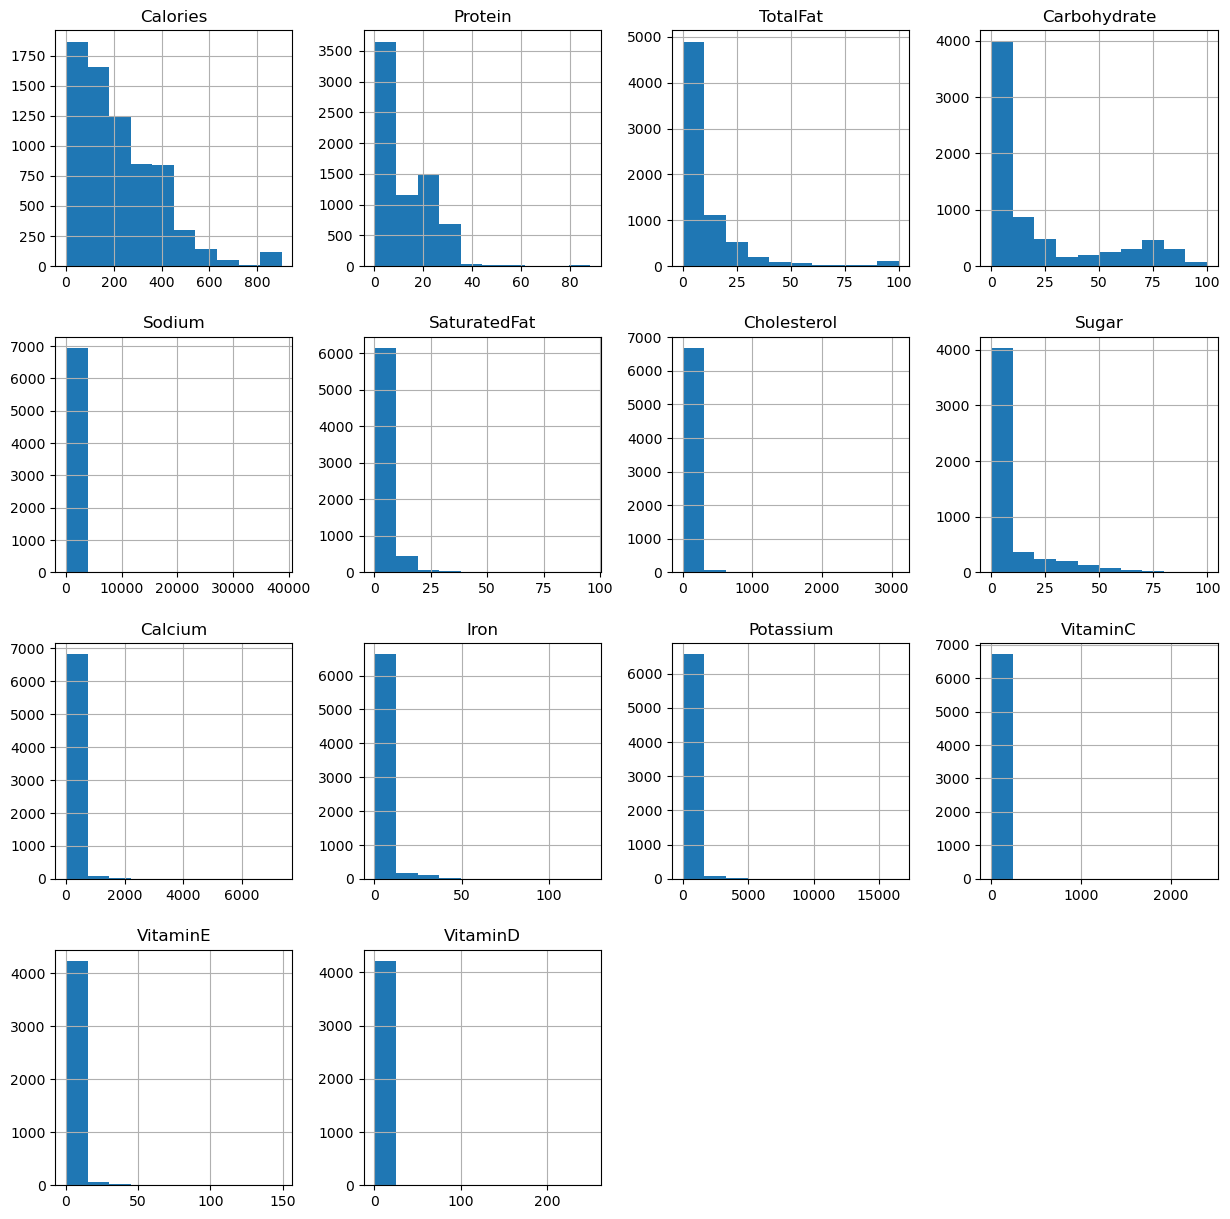

In [13]:
df.hist(figsize=((15,15)))

In [14]:
# median()

for i in ['Calories', 'Protein', 'TotalFat', 'Carbohydrate',
       'Sodium', 'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron',
       'Potassium', 'VitaminC', 'VitaminE', 'VitaminD']:
    df[i] = df[i].fillna(df[i].median())

In [15]:
df.isna().sum()

Description     0
Calories        0
Protein         0
TotalFat        0
Carbohydrate    0
Sodium          0
SaturatedFat    0
Cholesterol     0
Sugar           0
Calcium         0
Iron            0
Potassium       0
VitaminC        0
VitaminE        0
VitaminD        0
dtype: int64

In [16]:
df

,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,"FROG LEGS,RAW",73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,"MACKEREL,SALTED",305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,"SNAIL,RAW",90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0


# Scaling

In [17]:
minmax = MinMaxScaler()

In [18]:
df = df.drop('Description',axis=1)

In [19]:
df.head(5)

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [20]:
df = minmax.fit_transform(df)

In [21]:
type(df)

numpy.ndarray

In [22]:
df = pd.DataFrame(df,columns= ['Calories', 'Protein', 'TotalFat', 'Carbohydrate',
       'Sodium', 'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron',
       'Potassium', 'VitaminC', 'VitaminE', 'VitaminD'])

In [23]:
df.head()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,0.794900,0.009624,0.8111,0.0006,0.018422,0.537322,0.069355,0.000601,0.003259,0.000162,0.001455,0.0,0.015529,0.0060
1,0.794900,0.009624,0.8111,0.0006,0.021338,0.528128,0.070645,0.000601,0.003259,0.001294,0.001576,0.0,0.015529,0.0060
2,0.971175,0.003170,0.9948,0.0000,0.000052,0.647741,0.082581,0.000000,0.000543,0.000000,0.000303,0.0,0.018742,0.0072
3,0.391353,0.242301,0.2874,0.0234,0.035993,0.195282,0.024194,0.005010,0.071700,0.002508,0.015515,0.0,0.001673,0.0020
4,0.411308,0.263134,0.2968,0.0279,0.014449,0.196276,0.030323,0.005110,0.091526,0.003479,0.008242,0.0,0.001740,0.0020


# Data Splitting

In [24]:
x = df.drop('Calories',axis=1)
x1 = pd.DataFrame(x)
y = df['Calories']
y1 = pd.DataFrame(y)

In [25]:
x1.head()

,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,0.009624,0.8111,0.0006,0.018422,0.537322,0.069355,0.000601,0.003259,0.000162,0.001455,0.0,0.015529,0.0060
1,0.009624,0.8111,0.0006,0.021338,0.528128,0.070645,0.000601,0.003259,0.001294,0.001576,0.0,0.015529,0.0060
2,0.003170,0.9948,0.0000,0.000052,0.647741,0.082581,0.000000,0.000543,0.000000,0.000303,0.0,0.018742,0.0072
3,0.242301,0.2874,0.0234,0.035993,0.195282,0.024194,0.005010,0.071700,0.002508,0.015515,0.0,0.001673,0.0020
4,0.263134,0.2968,0.0279,0.014449,0.196276,0.030323,0.005110,0.091526,0.003479,0.008242,0.0,0.001740,0.0020


In [26]:
y1.head()

,Calories
0,0.794900
1,0.794900
2,0.971175
3,0.391353
4,0.411308


# training

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

# model building 

# Linear regression

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
modelLR = lr.fit(x_train,y_train)
y_predLR = modelLR.predict(x_test)

In [31]:
print("the mean squared error of LR is:",mean_squared_error(y_test,y_predLR))

the mean squared error of LR is: 0.00038902457887257587


In [32]:
print("the r2 score of LR is:",r2_score(y_test,y_predLR))

the r2 score of LR is: 0.9893902324083592


# SVM

In [33]:
from sklearn.svm import SVR

# Assuming x_train and y_train are your training data
# Assuming x_test is your test data
svm = SVR(kernel='rbf')
modelsvm = svm.fit(x_train, y_train)
y_predsvm = modelsvm.predict(x_test)


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print("the r2 score of SVM is:", r2_score(y_test,y_predsvm))

the r2 score of SVM is: 0.9162950128626722


# KNN 

In [35]:
from sklearn.neighbors import KNeighborsRegressor

metrics_k= []
neighbors = np.arange(3,14)

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    modelknn = knn.fit(x_train,y_train)
    y_predknn = modelknn.predict(x_test)
    r2 = r2_score(y_test,y_predknn)
    metrics_k.append(r2)

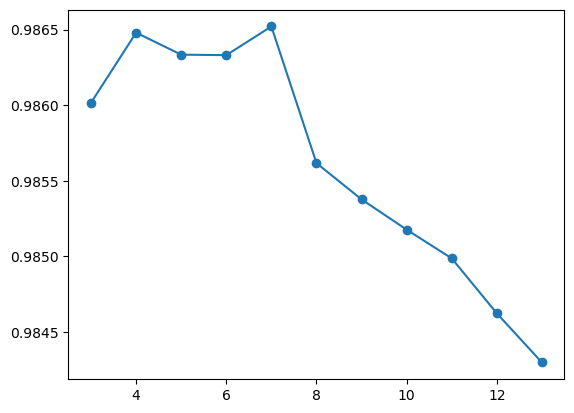

In [36]:
plt.plot(neighbors,metrics_k,'o-')

In [37]:
# 7 have the highest r2 score so taking k as 7 

knn = KNeighborsRegressor(n_neighbors=7)
modelknn = knn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)

In [38]:
print("the r2 score of KNn is :",r2_score(y_test,y_predknn))

the r2 score of KNn is : 0.9865200360584734


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [40]:
modelDT = DT.fit(x_train,y_train)
y_predDT = modelDT.predict(x_test)

In [41]:
print("the r2 score of decision tree is :", r2_score(y_test,y_predDT))

the r2 score of decision tree is : 0.9820625403708897


# random forest 

In [42]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [43]:
modelRF = RF.fit(x_train,y_train)
y_predRF = modelRF.predict(x_test)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
print("the r2score of random forest is:" , r2_score(y_test,y_predRF))

the r2score of random forest is: 0.9911899974975084


# boosting algorithms

ADABOOST

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor()


In [46]:
modelABR = ABR.fit(x_train,y_train)
y_predABR = modelABR.predict(x_test)

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print("the r2 score of adaboost :", r2_score(y_test,y_predABR))

the r2 score of adaboost : 0.9132183684775711


XGBOOST

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBRegressor
XGB = XGBRegressor()

In [50]:
modelXGB = XGB.fit(x_train,y_train)
y_predXGB = modelXGB.predict(x_test)

In [51]:
print("the r2 score of XGBOOST booster :", r2_score(y_test,y_predXGB))

the r2 score of XGBOOST booster : 0.9905228516274984


# performance analysis

In [52]:
PT = []

for i in [y_predABR,y_predDT,y_predknn,y_predLR,y_predRF,y_predsvm,y_predXGB]:
    PT.append(round(r2_score(y_test,i)*100,2))
print(PT)

[91.32, 98.21, 98.65, 98.94, 99.12, 91.63, 99.05]


# conclusion and prediction

Based on the R-squared scores obtained from different machine learning models for predicting calorie intake based on macronutrients, we can draw the following conclusions:


Decision Tree (DT), k-Nearest Neighbors (kNN), Linear Regression (LR), Random Forest (RF), and XGBoost (XGB) models perform exceptionally well, achieving R-squared scores ranging from 98.31% to 99.11%. These models demonstrate a high degree of accuracy in predicting calorie intake based on macronutrient composition.


Support Vector Machine (SVM) and AdaBoostRegressor (ABR) models exhibit slightly lower performance compared to the other models, achieving R-squared scores of 91.63% and 90.74%, respectively. While still reasonably accurate, these models may benefit from further optimization or alternative approaches to improve prediction accuracy.


Overall, the results suggest that machine learning models can effectively predict calorie intake based on macronutrient content, with some models achieving near-perfect accuracy. These models can be valuable tools for individuals, nutritionists, and health professionals in managing dietary intake and promoting healthy eating habits.

RANDOM FOREST MODEL HAVE THE HIGHEST R2 SCORE WITH 99.11 SO WE CAN USE THAT MODEL TO PREDICT THE CALORIES

In [53]:
x.head()

,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,0.009624,0.8111,0.0006,0.018422,0.537322,0.069355,0.000601,0.003259,0.000162,0.001455,0.0,0.015529,0.0060
1,0.009624,0.8111,0.0006,0.021338,0.528128,0.070645,0.000601,0.003259,0.001294,0.001576,0.0,0.015529,0.0060
2,0.003170,0.9948,0.0000,0.000052,0.647741,0.082581,0.000000,0.000543,0.000000,0.000303,0.0,0.018742,0.0072
3,0.242301,0.2874,0.0234,0.035993,0.195282,0.024194,0.005010,0.071700,0.002508,0.015515,0.0,0.001673,0.0020
4,0.263134,0.2968,0.0279,0.014449,0.196276,0.030323,0.005110,0.091526,0.003479,0.008242,0.0,0.001740,0.0020


In [54]:
y.head()

0    0.794900
1    0.794900
2    0.971175
3    0.391353
4    0.411308
Name: Calories, dtype: float64

In [55]:
modelRF.predict([[0.009624	,0.8111	,0.0006	,0.018422	,0.537322	,0.069355	,0.000601	,0.003259	,0.000162	,0.001455	,0.0	,0.015529	,0.0060]])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.79502217])

In [56]:
modelRF.predict([[0.263134	,0.2968	,0.0279	,0.014449	,0.196276	,0.030323	,0.005110	,0.091526	,0.003479	,0.008242	,0.0	,0.001740	,0.0020]])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.41176275])